In [79]:
import xarray as xr
import os
import glob
import geopandas as gpd
import pandas as pd
import numpy as np
from scipy.stats import linregress
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import HTML
from matplotlib.ticker import MaxNLocator


ros_colorbar = LinearSegmentedColormap.from_list('ros', [
    '#4B2D1A',  
    '#6B3F1E',  
    '#A0522D',  
    '#D2B48C',  
    'white',     
    '#A1C6E8',  
    '#4682B4',  
    '#1E3A5F',  
    '#0A1F38'   
])


In [9]:
path='/center1/DYNDOWN/phutton5/ROS/All_of_AK/All_of_AK_netcdf_files'
monthly=xr.open_dataset(path+'/theilsen_trend_mannkndall_monthly_1950_2022.nc')
monthly

<xarray.Dataset> Size: 1GB
Dimensions:                                  (month: 5, south_north: 450,
                                              west_east: 420, interp_level: 3)
Coordinates:
  * month                                    (month) int64 40B 11 12 1 2 3
    XLAT                                     (south_north, west_east) float32 756kB ...
    XLONG                                    (south_north, west_east) float32 756kB ...
    month_name                               (month) <U3 60B ...
  * interp_level                             (interp_level) float64 24B 850.0...
Dimensions without coordinates: south_north, west_east
Data variables: (12/104)
    ros_tally_slope_theilsen                 (month, south_north, west_east) float64 8MB ...
    ros_tally_intercept_theilsen             (month, south_north, west_east) float64 8MB ...
    ros_tally_low_slope_theilsen             (month, south_north, west_east) float64 8MB ...
    ros_tally_high_slope_theilsen            (month, south_north, west_east) float64 8MB ...
    ros_counts_slope_theilsen                (month, south_north, west_east) float64 8MB ...
    ros_counts_intercept_theilsen            (month, south_north, west_east) float64 8MB ...
    ...                                       ...
    temp_levels_avg_S_mannkendall            (month, interp_level, south_north, west_east) float64 23MB ...
    temp_levels_avg_var_S_mannkendall        (month, interp_level, south_north, west_east) float64 23MB ...
    temp_levels_ros_avg_tau_mannkendall      (month, interp_level, south_north, west_east) float64 23MB ...
    temp_levels_ros_avg_p_value_mannkendall  (month, interp_level, south_north, west_east) float64 23MB ...
    temp_levels_ros_avg_S_mannkendall        (month, interp_level, south_north, west_east) float64 23MB ...
    temp_levels_ros_avg_var_S_mannkendall    (month, interp_level, south_north, west_east) float64 23MB ...

In [10]:
seasonal=xr.open_dataset(path+'/theilsen_trend_mannkndall_seasonal_1950_2022.nc')
seasonal

<xarray.Dataset> Size: 207MB
Dimensions:                                  (south_north: 450, west_east: 420,
                                              interp_level: 3)
Coordinates:
    XLAT                                     (south_north, west_east) float32 756kB ...
    XLONG                                    (south_north, west_east) float32 756kB ...
  * interp_level                             (interp_level) float64 24B 850.0...
Dimensions without coordinates: south_north, west_east
Data variables: (12/104)
    ros_tally_slope_theilsen                 (south_north, west_east) float64 2MB ...
    ros_tally_intercept_theilsen             (south_north, west_east) float64 2MB ...
    ros_tally_low_slope_theilsen             (south_north, west_east) float64 2MB ...
    ros_tally_high_slope_theilsen            (south_north, west_east) float64 2MB ...
    ros_counts_slope_theilsen                (south_north, west_east) float64 2MB ...
    ros_counts_intercept_theilsen            (south_north, west_east) float64 2MB ...
    ...                                       ...
    temp_levels_avg_S_mannkendall            (interp_level, south_north, west_east) float64 5MB ...
    temp_levels_avg_var_S_mannkendall        (interp_level, south_north, west_east) float64 5MB ...
    temp_levels_ros_avg_tau_mannkendall      (interp_level, south_north, west_east) float64 5MB ...
    temp_levels_ros_avg_p_value_mannkendall  (interp_level, south_north, west_east) float64 5MB ...
    temp_levels_ros_avg_S_mannkendall        (interp_level, south_north, west_east) float64 5MB ...
    temp_levels_ros_avg_var_S_mannkendall    (interp_level, south_north, west_east) float64 5MB ...

In [ ]:
def plot_row(ax_row, datasets):
    for ax, (data, pvals, title) in zip(ax_row, datasets):
        pcm = ax.pcolormesh(
            lon, lat, data,
            cmap=cmap,
            vmin=vmin, vmax=vmax,
            shading='auto',
            transform=ccrs.PlateCarree()
        )

        sig = pvals < 0.05

        ax.contourf(
            lon, lat, sig,
            levels=[0.5, 1.5],
            colors='none',
            hatches=['...'],
            transform=ccrs.PlateCarree()
        )

        ax.set_title(title, fontsize=14, fontweight="bold")
        ax.add_feature(cfeature.BORDERS, zorder=8)
        ax.add_feature(cfeature.COASTLINE, zorder=8)
        ax.add_feature(cfeature.RIVERS, zorder=8)
        ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
        ax.set_aspect('equal')

    return pcm

In [17]:
'''
lat = data['XLAT'].isel(west_east=0).values
lon = data['XLONG'].isel(south_north=0).values
'''

"\nlat = data['XLAT'].isel(west_east=0).values\nlon = data['XLONG'].isel(south_north=0).values\n"

In [2]:
'''
path='/center1/DYNDOWN/phutton5/ROS/All_of_AK/All_of_AK_netcdf_files'

rain_ros_avg = xr.open_dataset(path+'/linear_trend_rain_ros_avg_1950_2022.nc')
rain_ros_sum = xr.open_dataset(path+'/linear_trend_rain_ros_sum_1950_2022.nc')
ros_days_count = xr.open_dataset(path+'/linear_trend_ros_days_count_1950_2022.nc')
ros_tally = xr.open_dataset(path+'/linear_trend_ros_tally_1950_2022.nc')
T2_avg = xr.open_dataset(path+'/linear_trend_T2_avg_1950_2022.nc')
T2_ros_avg = xr.open_dataset(path+'/linear_trend_T2_ros_avg_1950_2022.nc')  
swe_avg=xr.open_dataset(path+'/linear_trend_swe_avg_1950_2022.nc') 
seasonal_ros_hourly = xr.open_dataset(path+'/linear_seasonal_trend_ros_hourly_1950_2022.nc')
'''

"\npath='/center1/DYNDOWN/phutton5/ROS/All_of_AK/All_of_AK_netcdf_files'\n\nrain_ros_avg = xr.open_dataset(path+'/linear_trend_rain_ros_avg_1950_2022.nc')\nrain_ros_sum = xr.open_dataset(path+'/linear_trend_rain_ros_sum_1950_2022.nc')\nros_days_count = xr.open_dataset(path+'/linear_trend_ros_days_count_1950_2022.nc')\nros_tally = xr.open_dataset(path+'/linear_trend_ros_tally_1950_2022.nc')\nT2_avg = xr.open_dataset(path+'/linear_trend_T2_avg_1950_2022.nc')\nT2_ros_avg = xr.open_dataset(path+'/linear_trend_T2_ros_avg_1950_2022.nc')  \nswe_avg=xr.open_dataset(path+'/linear_trend_swe_avg_1950_2022.nc') \nseasonal_ros_hourly = xr.open_dataset(path+'/linear_seasonal_trend_ros_hourly_1950_2022.nc')\n"

In [16]:
shapefile_path = "/center1/DYNDOWN/phutton5/ROS/boundaries/Alaska_Borough_and_Census_Area_Boundaries.shp"
borough_boundaries = gpd.read_file(shapefile_path)
borough_boundaries = borough_boundaries.set_crs(epsg=3338)
borough_boundaries = borough_boundaries.to_crs(epsg=4326)
FNSB_boundary = borough_boundaries[borough_boundaries['CommunityN'] == 'Fairbanks North Star Borough']
FNSB_geom = FNSB_boundary.geometry.iloc[0] 
FNSB_coords = []
FNSB_coords.extend(list(FNSB_geom.exterior.coords))
FNSB_coords = np.array(FNSB_coords)  
FNSB_coords = pd.DataFrame({
    "lon": FNSB_coords[:, 0],
    "lat": FNSB_coords[:, 1]})

Fairbanks_lat=(64.84)
Fairbanks_lon=(-147.72)
lat=seasonal['XLAT']
lon=seasonal['XLONG']

rain_ros_avg,rain_ros_sum,T2_avg,T2_ros_avg

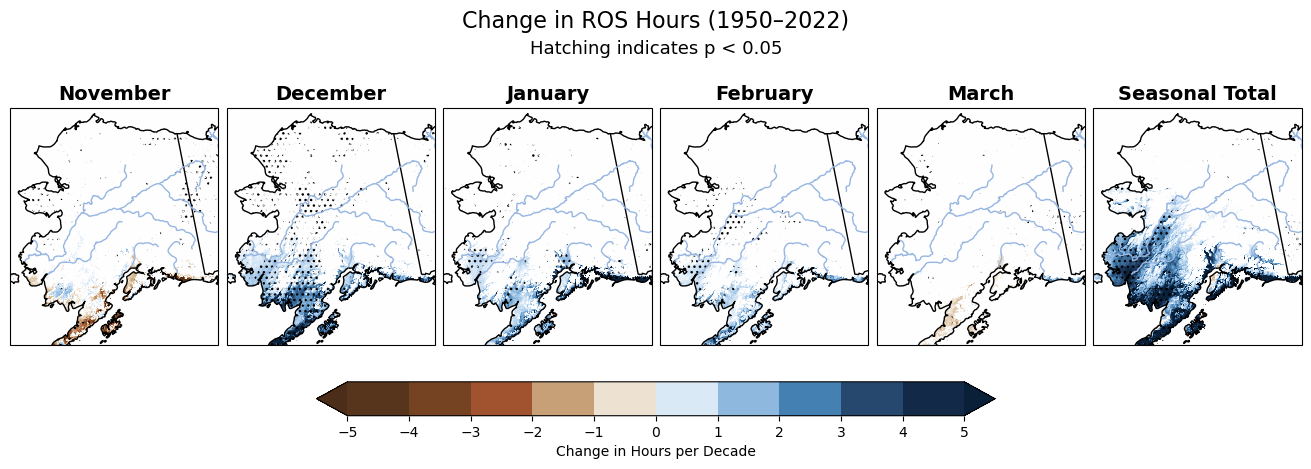

In [83]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154,
        central_latitude=50,
        standard_parallels=(55, 65))}
fig, axs = plt.subplots(
    nrows=1, ncols=6,
    figsize=(13, 5.5),
    subplot_kw=AK_ALBERS_SUBPLOT_KW,
    constrained_layout=True)
levels=np.arange(-5,6,1)
vmin, vmax = -5,5


cmap=ros_colorbar
#cmap = LinearSegmentedColormap.from_list('ros', ["brown", "tan", 'white', "lightblue", "darkblue"])
#cmap = 'coolwarm'

datasets = [
    (monthly['ros_tally_slope_theilsen'].sel(month=11)*10,monthly['ros_tally_p_value_mannkendall'].sel(month=11), "November"),
    (monthly['ros_tally_slope_theilsen'].sel(month=12)*10,monthly['ros_tally_p_value_mannkendall'].sel(month=12), "December"),
    (monthly['ros_tally_slope_theilsen'].sel(month=1)*10,monthly['ros_tally_p_value_mannkendall'].sel(month=1), "January"),
    (monthly['ros_tally_slope_theilsen'].sel(month=2)*10,monthly['ros_tally_p_value_mannkendall'].sel(month=2), "February"),
    (monthly['ros_tally_slope_theilsen'].sel(month=3)*10,monthly['ros_tally_p_value_mannkendall'].sel(month=3), "March"),
    (seasonal['ros_tally_slope_theilsen']*10,seasonal['ros_tally_p_value_mannkendall'],"Seasonal Total")]

for ax, (data,pvals,title) in zip(axs, datasets):
    pcm = ax.pcolormesh(
        lon, lat, data,
        cmap= ros_colorbar,
        #cmap='BrBG',
        vmin=vmin, vmax=vmax,
        shading='auto',
        transform=ccrs.PlateCarree())
    sig = pvals < 0.05

    ax.contourf(
        lon, lat,
        sig,
        levels=[0.5, 1.5],
        colors='none',
        hatches=['...'],
        transform=ccrs.PlateCarree()
    )
    
    
    #ax.set_title(title)
    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
    #ax.set_extent([-151.5, -148, 60.5, 62.5], crs=ccrs.PlateCarree()) 
    ax.set_aspect('equal')


fig.suptitle("Change in ROS Hours (1950–2022)",fontsize=16, y=0.83)
fig.text(0.5, 0.75, "Hatching indicates p < 0.05",ha='center',fontsize=13)
cbar = fig.colorbar(pcm, ax=axs, boundaries=levels, orientation='horizontal',fraction=0.08, pad=0.08,extend='both')
cbar.set_label(r'Change in Hours per Decade')
cbar.set_ticks(np.arange(-5, 6,1))

fig.patch.set_alpha(0.0)
plt.show()

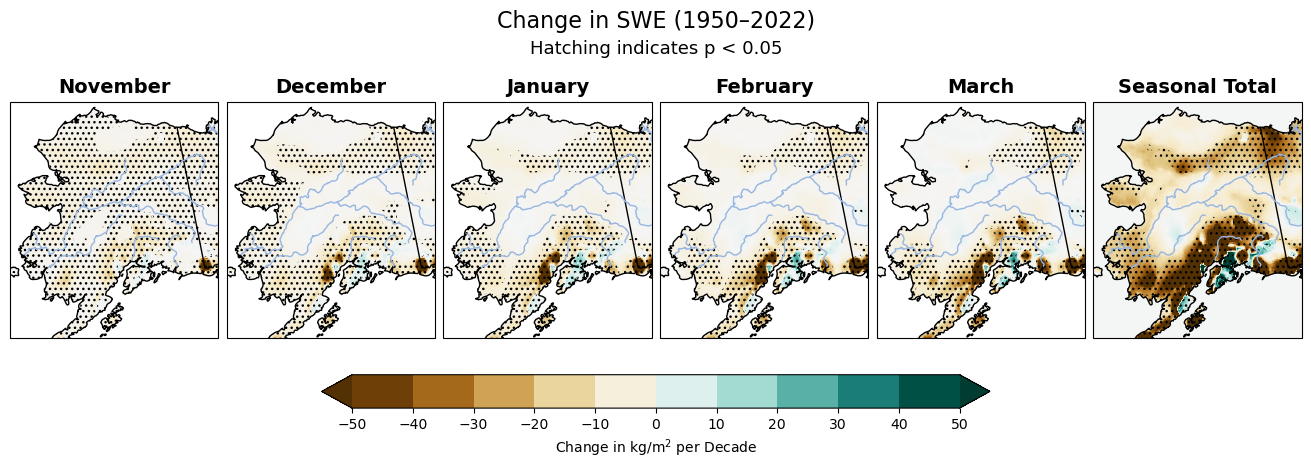

In [48]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154,
        central_latitude=50,
        standard_parallels=(55, 65))}
fig, axs = plt.subplots(
    nrows=1, ncols=6,
    figsize=(13, 5.5),
    subplot_kw=AK_ALBERS_SUBPLOT_KW,
    constrained_layout=True)

vmin, vmax = -50,50
cmap = 'BrBG'

datasets = [
    (monthly['swe_avg_slope_theilsen'].sel(month=11)*10,monthly['swe_avg_p_value_mannkendall'].sel(month=11), "November"),
    (monthly['swe_avg_slope_theilsen'].sel(month=12)*10,monthly['swe_avg_p_value_mannkendall'].sel(month=12), "December"),
    (monthly['swe_avg_slope_theilsen'].sel(month=1)*10,monthly['swe_avg_p_value_mannkendall'].sel(month=1), "January"),
    (monthly['swe_avg_slope_theilsen'].sel(month=2)*10,monthly['swe_avg_p_value_mannkendall'].sel(month=2), "February"),
    (monthly['swe_avg_slope_theilsen'].sel(month=3)*10,monthly['swe_avg_p_value_mannkendall'].sel(month=3), "March"),
    (seasonal['swe_avg_slope_theilsen']*10,seasonal['swe_avg_p_value_mannkendall'],"Seasonal Total")]


levels = np.arange(-50, 60, 10)


for ax, (data,pvals,title) in zip(axs, datasets):
    pcm = ax.pcolormesh(
        lon, lat, data,
        cmap=cmap,
        vmin=vmin, vmax=vmax,
        shading='auto',
        transform=ccrs.PlateCarree())
    sig = pvals < 0.05

    ax.contourf(
        lon, lat,
        sig,
        levels=[0.5, 1.5],
        colors='none',
        hatches=['...'],
        transform=ccrs.PlateCarree()
    )
    
    
    ax.set_title(title, fontsize=14, fontweight="bold")

    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
    #ax.set_extent([-151.5, -148, 60.5, 62.5], crs=ccrs.PlateCarree()) 
    ax.set_aspect('equal')

fig.suptitle("Change in SWE (1950–2022)",fontsize=16, y=0.83)
fig.text(0.5, 0.75, "Hatching indicates p < 0.05",ha='center',fontsize=13)
cbar = fig.colorbar(pcm, ax=axs, boundaries=levels, orientation='horizontal',fraction=0.08, pad=0.08,extend='both')
cbar.set_label(r'Change in kg/m$^2$ per Decade')
cbar.set_ticks(np.arange(-50, 60, 10))

fig.patch.set_alpha(0.0)
plt.show()

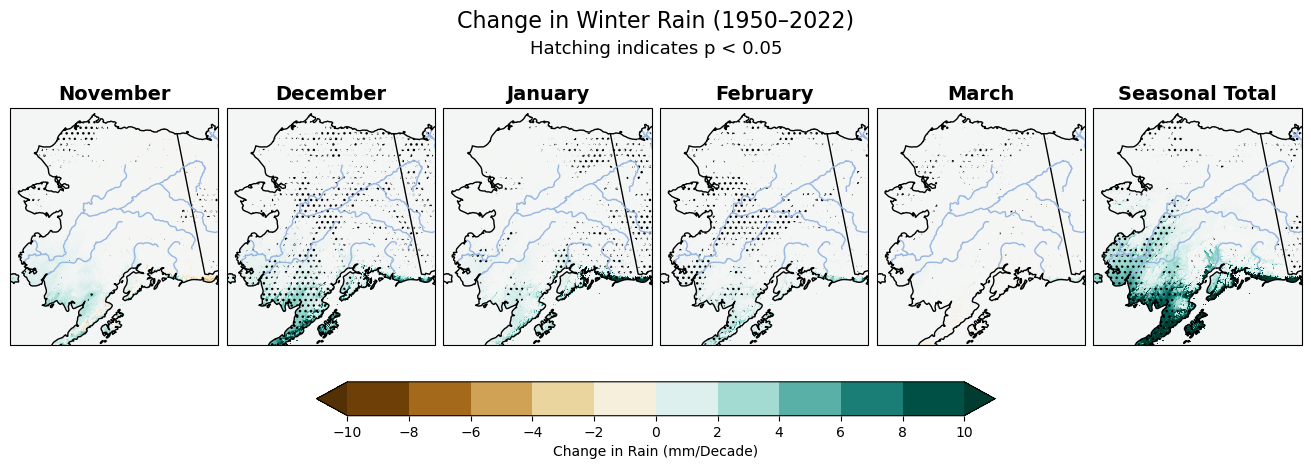

In [47]:
#rain_sum_slope_theilsen
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154,
        central_latitude=50,
        standard_parallels=(55, 65))}
fig, axs = plt.subplots(
    nrows=1, ncols=6,
    figsize=(13, 5.5),
    subplot_kw=AK_ALBERS_SUBPLOT_KW,
    constrained_layout=True)

vmin, vmax = -10,10
cmap = 'BrBG'
levels = np.arange(-10, 12, 2)


datasets = [
    (monthly['rain_sum_slope_theilsen'].sel(month=11)*10,monthly['rain_sum_p_value_mannkendall'].sel(month=11), "November"),
    (monthly['rain_sum_slope_theilsen'].sel(month=12)*10,monthly['rain_sum_p_value_mannkendall'].sel(month=12), "December"),
    (monthly['rain_sum_slope_theilsen'].sel(month=1)*10,monthly['rain_sum_p_value_mannkendall'].sel(month=1), "January"),
    (monthly['rain_sum_slope_theilsen'].sel(month=2)*10,monthly['rain_sum_p_value_mannkendall'].sel(month=2), "February"),
    (monthly['rain_sum_slope_theilsen'].sel(month=3)*10,monthly['rain_sum_p_value_mannkendall'].sel(month=3), "March"),
    (seasonal['rain_sum_slope_theilsen']*10,seasonal['rain_sum_p_value_mannkendall'],"Seasonal Total")]

for ax, (data,pvals,title) in zip(axs, datasets):
    pcm = ax.pcolormesh(
        lon, lat, data,
        cmap=cmap,
        vmin=vmin, vmax=vmax,
        shading='auto',
        transform=ccrs.PlateCarree())
    sig = pvals < 0.05

    ax.contourf(
        lon, lat,
        sig,
        levels=[0.5, 1.5],
        colors='none',
        hatches=['...'],
        transform=ccrs.PlateCarree()
    )
    
    
    ax.set_title(title, fontsize=14, fontweight="bold")

    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
    #ax.set_extent([-151.5, -148, 60.5, 62.5], crs=ccrs.PlateCarree()) 
    ax.set_aspect('equal')

fig.suptitle("Change in Winter Rain (1950–2022)",fontsize=16, y=0.83)
fig.text(0.5, 0.75, "Hatching indicates p < 0.05",ha='center',fontsize=13)
cbar = fig.colorbar(pcm, ax=axs, boundaries=levels,orientation='horizontal',fraction=0.08, pad=0.08,extend='both')
cbar.set_label(r'Change in Rain (mm/Decade)')
cbar.set_ticks(np.arange(-10, 12, 2))

fig.patch.set_alpha(0.0)
plt.show()

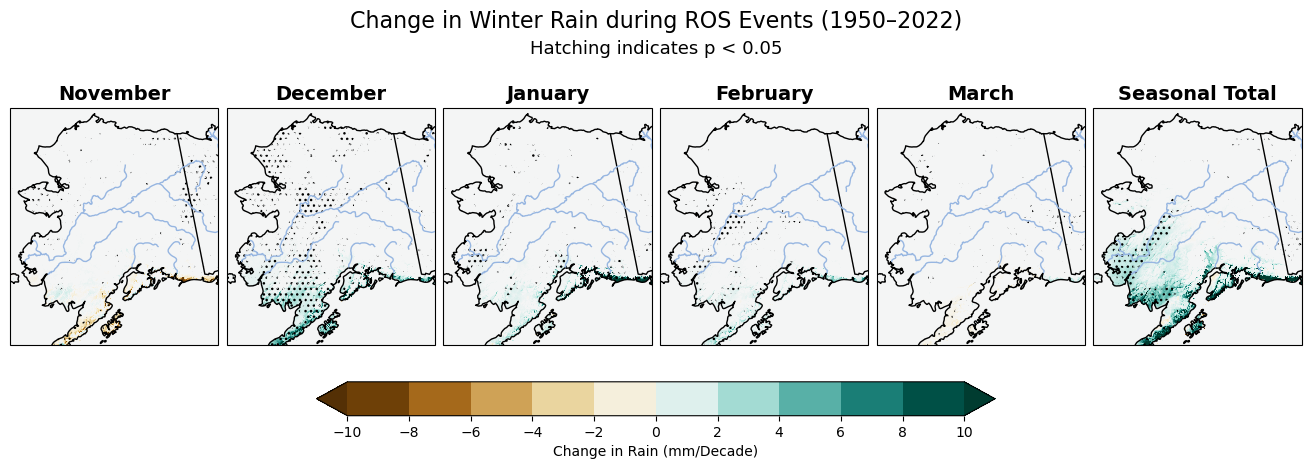

In [54]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154,
        central_latitude=50,
        standard_parallels=(55, 65))}
fig, axs = plt.subplots(
    nrows=1, ncols=6,
    figsize=(13, 5.5),
    subplot_kw=AK_ALBERS_SUBPLOT_KW,
    constrained_layout=True)
levels=np.arange(-10, 12, 2)
vmin, vmax = -10,10
cmap = 'BrBG'

datasets = [
    (monthly['rain_ros_sum_slope_theilsen'].sel(month=11)*10,monthly['rain_ros_sum_p_value_mannkendall'].sel(month=11), "November"),
    (monthly['rain_ros_sum_slope_theilsen'].sel(month=12)*10,monthly['rain_ros_sum_p_value_mannkendall'].sel(month=12), "December"),
    (monthly['rain_ros_sum_slope_theilsen'].sel(month=1)*10,monthly['rain_ros_sum_p_value_mannkendall'].sel(month=1), "January"),
    (monthly['rain_ros_sum_slope_theilsen'].sel(month=2)*10,monthly['rain_ros_sum_p_value_mannkendall'].sel(month=2), "February"),
    (monthly['rain_ros_sum_slope_theilsen'].sel(month=3)*10,monthly['rain_ros_sum_p_value_mannkendall'].sel(month=3), "March"),
    (seasonal['rain_ros_sum_slope_theilsen']*10,seasonal['rain_ros_sum_p_value_mannkendall'],"Seasonal Total")]

for ax, (data,pvals,title) in zip(axs, datasets):
    pcm = ax.pcolormesh(
        lon, lat, data,
        cmap=cmap,
        vmin=vmin, vmax=vmax,
        shading='auto',
        transform=ccrs.PlateCarree())
    sig = pvals < 0.05

    ax.contourf(
        lon, lat,
        sig,
        levels=[0.5, 1.5],
        colors='none',
        hatches=['...'],
        transform=ccrs.PlateCarree()
    )
    
    
    ax.set_title(title, fontsize=14, fontweight="bold")

    ax.add_feature(cfeature.BORDERS, zorder=8)
    ax.add_feature(cfeature.COASTLINE, zorder=8)
    ax.add_feature(cfeature.RIVERS, zorder=8)
    ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
    #ax.set_extent([-151.5, -148, 60.5, 62.5], crs=ccrs.PlateCarree()) 
    ax.set_aspect('equal')

fig.suptitle("Change in Winter Rain during ROS Events (1950–2022)",fontsize=16, y=0.83)
fig.text(0.5, 0.75, "Hatching indicates p < 0.05",ha='center',fontsize=13)
cbar = fig.colorbar(pcm, ax=axs,boundaries=levels,orientation='horizontal',fraction=0.08, pad=0.08,extend='both')
cbar.set_label(r'Change in Rain (mm/Decade)')
cbar.set_ticks(np.arange(-10, 12, 2))

fig.patch.set_alpha(0.0)
plt.show()

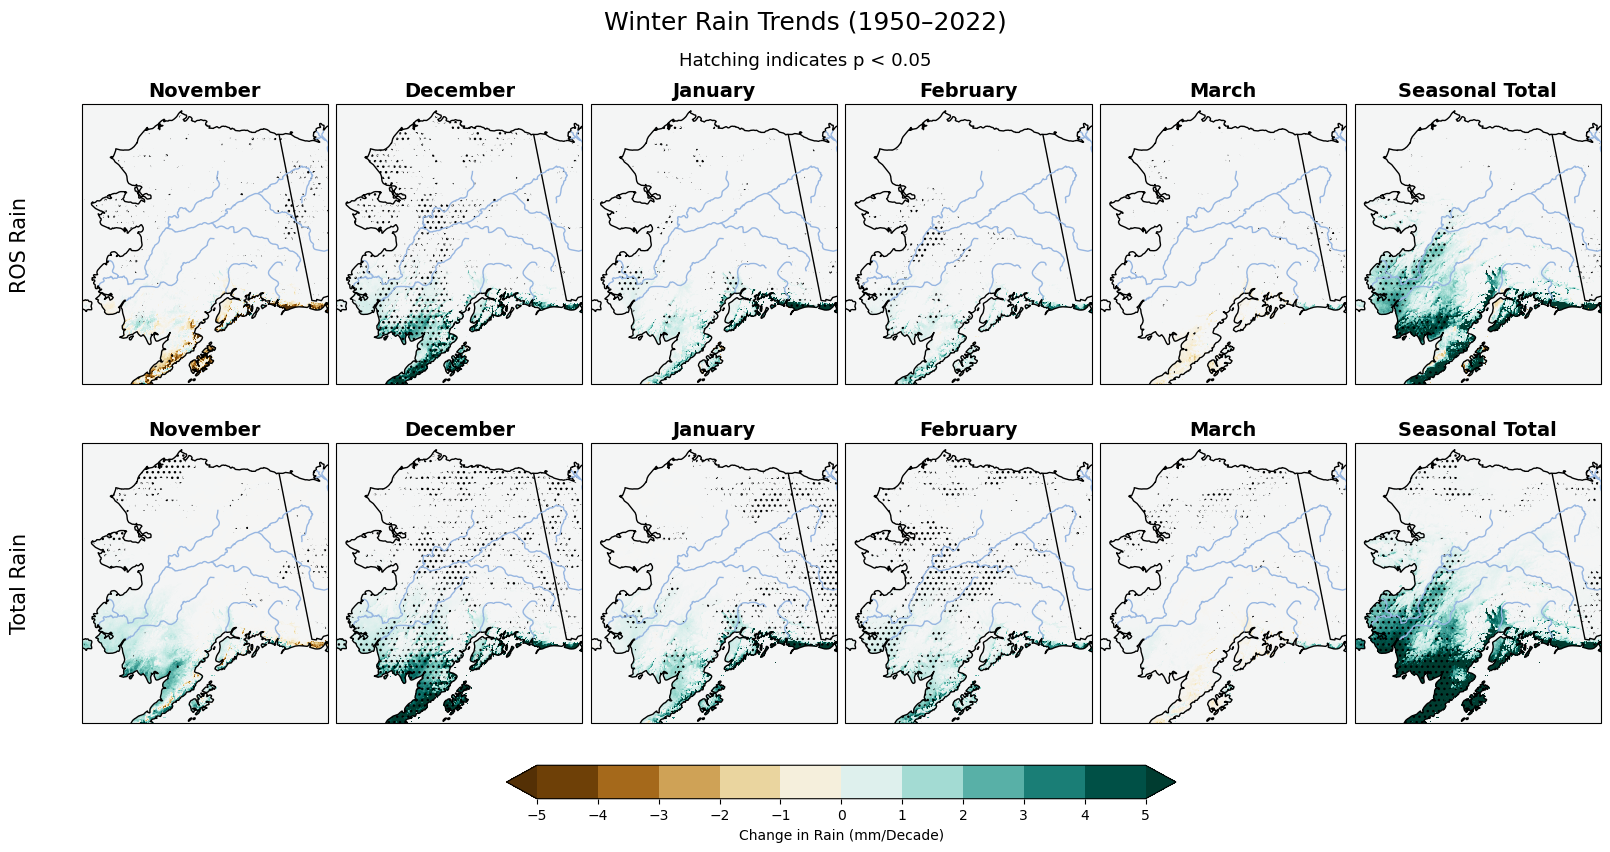

In [53]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154,
        central_latitude=50,
        standard_parallels=(55, 65))
}

fig, axs = plt.subplots(
    nrows=2, ncols=6,
    figsize=(16, 8),
    subplot_kw=AK_ALBERS_SUBPLOT_KW,
    constrained_layout=True)
levels=np.arange(-5, 6, 1)
vmin, vmax = -5, 5
cmap = 'BrBG'

ros_datasets = [
    (monthly['rain_ros_sum_slope_theilsen'].sel(month=11)*10, monthly['rain_ros_sum_p_value_mannkendall'].sel(month=11), "November"),
    (monthly['rain_ros_sum_slope_theilsen'].sel(month=12)*10, monthly['rain_ros_sum_p_value_mannkendall'].sel(month=12), "December"),
    (monthly['rain_ros_sum_slope_theilsen'].sel(month=1)*10,  monthly['rain_ros_sum_p_value_mannkendall'].sel(month=1),  "January"),
    (monthly['rain_ros_sum_slope_theilsen'].sel(month=2)*10,  monthly['rain_ros_sum_p_value_mannkendall'].sel(month=2),  "February"),
    (monthly['rain_ros_sum_slope_theilsen'].sel(month=3)*10,  monthly['rain_ros_sum_p_value_mannkendall'].sel(month=3),  "March"),
    (seasonal['rain_ros_sum_slope_theilsen']*10, seasonal['rain_ros_sum_p_value_mannkendall'], "Seasonal Total")
]

rain_datasets = [
    (monthly['rain_sum_slope_theilsen'].sel(month=11)*10, monthly['rain_sum_p_value_mannkendall'].sel(month=11), "November"),
    (monthly['rain_sum_slope_theilsen'].sel(month=12)*10, monthly['rain_sum_p_value_mannkendall'].sel(month=12), "December"),
    (monthly['rain_sum_slope_theilsen'].sel(month=1)*10,  monthly['rain_sum_p_value_mannkendall'].sel(month=1),  "January"),
    (monthly['rain_sum_slope_theilsen'].sel(month=2)*10,  monthly['rain_sum_p_value_mannkendall'].sel(month=2),  "February"),
    (monthly['rain_sum_slope_theilsen'].sel(month=3)*10,  monthly['rain_sum_p_value_mannkendall'].sel(month=3),  "March"),
    (seasonal['rain_sum_slope_theilsen']*10, seasonal['rain_sum_p_value_mannkendall'], "Seasonal Total")
]

pcm = plot_row(axs[0], ros_datasets)
plot_row(axs[1], rain_datasets)

axs[0,0].text(-0.25, 0.5, "ROS Rain",
              rotation=90, transform=axs[0,0].transAxes,
              va='center', ha='center', fontsize=15)

axs[1,0].text(-0.25, 0.5, "Total Rain",
              rotation=90, transform=axs[1,0].transAxes,
              va='center', ha='center', fontsize=15)

fig.suptitle("Winter Rain Trends (1950–2022)\n", fontsize=18, y=1.05)
fig.text(0.5, 0.98, "Hatching indicates p < 0.05",
         ha='center', fontsize=13)

cbar = fig.colorbar(
    pcm, ax=axs,
    orientation='horizontal',
    fraction=0.05, pad=0.06,
    extend='both',
    boundaries=levels
)
cbar.set_label('Change in Rain (mm/Decade)')
cbar.set_ticks(np.arange(-5, 6, 1))

fig.patch.set_alpha(0.0)
plt.show()


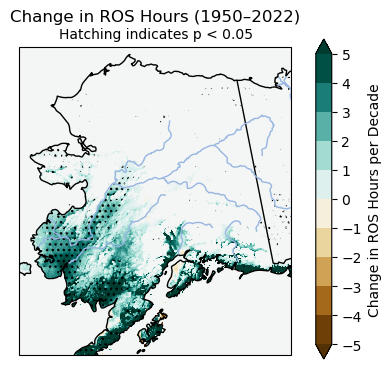

In [76]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154,
        central_latitude=50,
        standard_parallels=(55, 65))}

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))
levels=np.arange(-5,6,1)
# Make background transparent
fig.patch.set_alpha(0)
ax.set_facecolor('none')

pcm = ax.pcolormesh(
    lon, lat, seasonal['ros_tally_slope_theilsen']*10,
    cmap='BrBG',
    vmin=-5, vmax=5,
    shading='auto',
    transform=ccrs.PlateCarree()
)
pvals = seasonal['ros_tally_p_value_mannkendall']
sig = pvals < 0.05

ax.contourf(
        lon, lat,
        sig,
        levels=[0.5, 1.5],
        colors='none',
        hatches=['...'],
        transform=ccrs.PlateCarree()
    )

cbar = fig.colorbar(pcm, ax=ax, boundaries=levels ,extend='both',label='Change in ROS Hours per Decade')
cbar.set_ticks(np.arange(-5, 5.5, 0.5)[::2])
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.set_title( "Change in ROS Hours (1950–2022)\n ")
fig.text(0.61, 0.93, "Hatching indicates p < 0.05",va='top',ha='center',fontsize=10)

ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

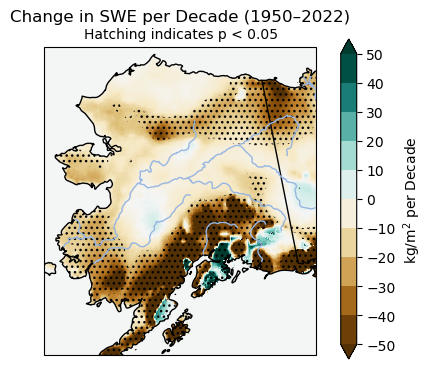

In [59]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154,
        central_latitude=50,
        standard_parallels=(55, 65))}

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))

# Make background transparent
fig.patch.set_alpha(0)
ax.set_facecolor('none')
levels=np.arange(-50,60,10)
pcm = ax.pcolormesh(
    lon, lat, seasonal['swe_avg_slope_theilsen']*10,
    cmap='BrBG',
    vmin=-50, vmax=50,
    shading='auto',
    transform=ccrs.PlateCarree()
)
pvals = seasonal['swe_avg_p_value_mannkendall']
sig = pvals < 0.05

ax.contourf(
        lon, lat,
        sig,
        levels=[0.5, 1.5],
        colors='none',
        hatches=['...'],
        transform=ccrs.PlateCarree()
    )

cbar = fig.colorbar(pcm, ax=ax,boundaries=levels, extend='both', label=r'kg/m$^2$ per Decade')
cbar.set_ticks(np.arange(-50, 60,10))
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.set_title("Change in SWE per Decade (1950–2022)\n")
fig.text(0.61, 0.93, "Hatching indicates p < 0.05",va='top',ha='center',fontsize=10)

ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

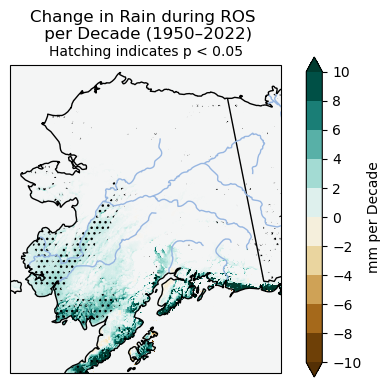

In [63]:
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(
        central_longitude=-154,
        central_latitude=50,
        standard_parallels=(55, 65))}

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))
levels=np.arange(-10, 12,2)
# Make background transparent
fig.patch.set_alpha(0)
ax.set_facecolor('none')
# (seasonal['rain_ros_sum_slope_theilsen']*10, seasonal['rain_ros_sum_p_value_mannkendall'], "Seasonal Total")
pcm = ax.pcolormesh(
    lon, lat, seasonal['rain_ros_sum_slope_theilsen']*10,
    cmap='BrBG',
    vmin=-10, vmax=10,
    shading='auto',
    transform=ccrs.PlateCarree()
)
pvals = seasonal['rain_ros_sum_p_value_mannkendall']
sig = pvals < 0.05

ax.contourf(
        lon, lat,
        sig,
        levels=[0.5, 1.5],
        colors='none',
        hatches=['...'],
        transform=ccrs.PlateCarree()
    )

cbar = fig.colorbar(pcm,boundaries=levels, ax=ax, extend='both', label=r'mm per Decade')
cbar.set_ticks(np.arange(-10, 12,2))
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.set_title("Change in Rain during ROS \n per Decade (1950–2022)\n")
fig.text(0.61, 0.93, "Hatching indicates p < 0.05",va='top',ha='center',fontsize=10)

ax.set_extent([-165.3, -141, 55.8, 71.38], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()